In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [3]:
merged_df = pd.read_csv('../../data/life/life_data.csv')
# merged_df.head(), merged_df.shape, merged_df.columns.unique()

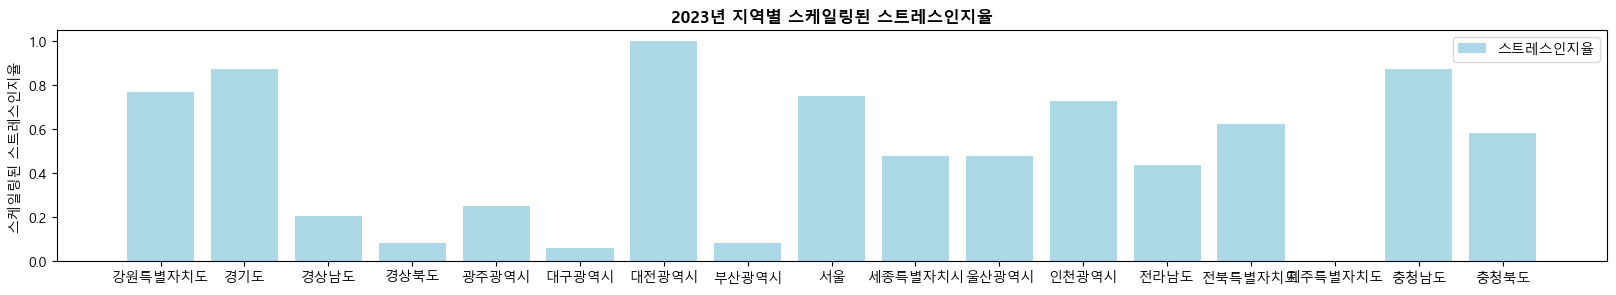

In [4]:
# 지역별 스트레스인지율 시각화
data_2023 = merged_df[merged_df['시점'] == 2023].copy()

scaler = MinMaxScaler()
data_2023.loc[:, ['스트레스인지율']] = scaler.fit_transform(data_2023[['스트레스인지율']])
# print(data_2023[['지역별', '스트레스인지율']])

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['스트레스인지율'], color='lightblue', label='스트레스인지율')
ax1.set_ylabel('스케일링된 스트레스인지율')
ax1.tick_params(axis='y')

plt.title('2023년 지역별 스케일링된 스트레스인지율', fontweight='bold')
ax1.legend(loc='upper right')

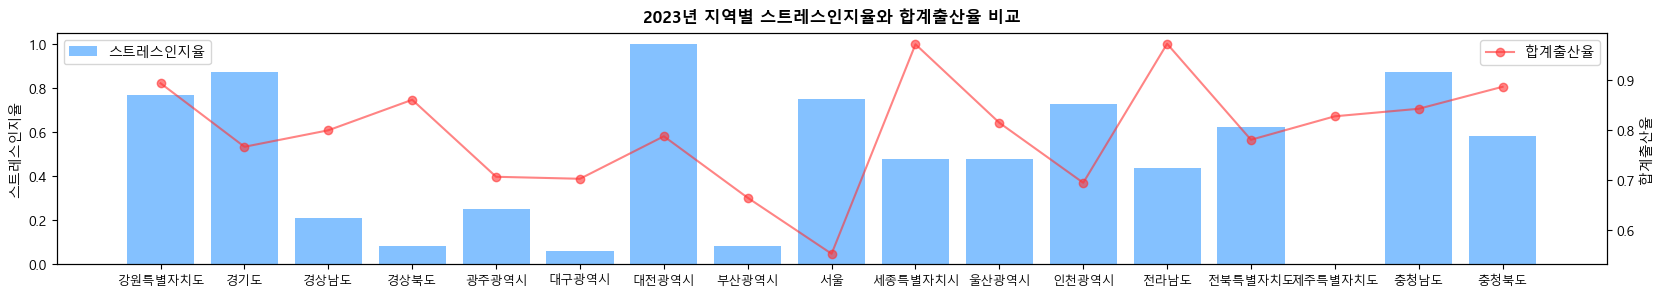

In [5]:
# 지역별 스트레스인지율 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')['합계출산율'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 3))

ax1.bar(data_2023['지역별'], data_2023['스트레스인지율'], color=(0.2, 0.6, 1.0, 0.6), label='스트레스인지율')
ax1.set_ylabel('스트레스인지율', fontsize=10)
ax1.set_title('2023년 지역별 스트레스인지율와 합계출산율 비교', pad=8, fontweight='bold')
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(1.0, 0.2, 0.2, 0.6), marker='o', label='합계출산율')
ax2.set_ylabel('합계출산율', fontsize=10)
ax2.tick_params(axis='y', labelsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')